In [128]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PolynomialFeatures

In [73]:
df = pd.read_clipboard(sep=",")

In [74]:
df

,x,y,z
0,28.078767,346.342190,a
1,-0.949824,351.372747,a
2,14.202142,382.785144,a
3,2.779281,351.063280,a
4,21.295591,367.689753,a
...,...,...,...
1371,548.524140,192.851844,c
1372,539.626516,127.562467,c
1373,567.928551,95.909495,c
1374,542.904902,98.695818,c


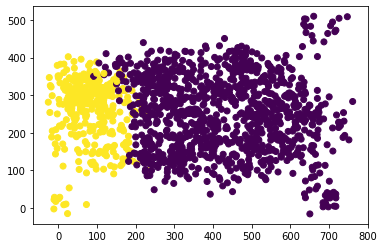

In [86]:
X = df[['x','y']].values
y = df['z'] == 'a'

plt.scatter(X[:,0], X[:,1], c=y)

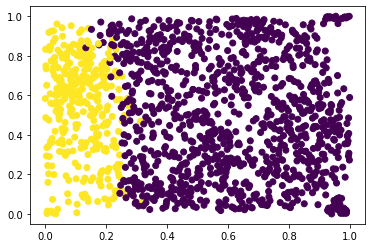

In [82]:
X_new = QuantileTransformer(n_quantiles=1000).fit_transform(X)
plt.scatter(X_new[:,0], X_new[:,1], c=y)

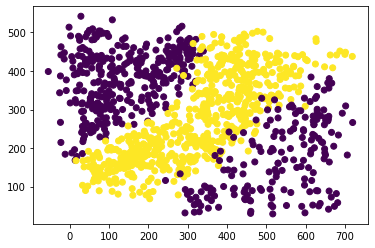

In [95]:
df1 = pd.read_clipboard(sep=",")
X = df1[['x','y']].values
y = df1['z'] == 'b'

plt.scatter(X[:,0], X[:,1], c=y)

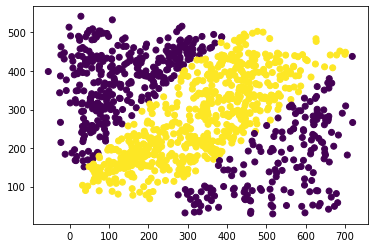

In [96]:
pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])
pred = pipe.fit(X,y).predict(X)
plt.scatter(X[:,0], X[:, 1], c=pred)